<H3>Raman curve fit:</H3>
curve fit with 3 lorentz peaks of G, D, G' for CSV text outputs obtained by LabRam HR-800 <br>
2021.08.10 ver.0.1 by fur.    curve fit with LMFIT and shows fitting curves.<br>
2021.08.10 ver.0.11 by fur.    Get G/D area ratio, and G/D height ratio <br>
2021.08.10 ver.0.12 by fur.   File chooser only works for jupyter notebook using ipyfilechooser <br>
2022.09.13 ver.0.13 by fur.   StdErr evaluated in G/D height ratio <br>

<H4>References:<H4>
<OL>
    <LI>LMFIT, https://lmfit.github.io/lmfit-py/</LI>
    <LI>https://sabopy.com/py/lmfit-5/</LI>
    <LI>Multi peak fitting, emilyripka, https://github.com/emilyripka/BlogRepo/blob/master/181119_PeakFitting.ipynb</LI>
</OL>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
from lmfit.lineshapes import lorentzian
from lmfit.models import LinearModel, LorentzianModel

In [5]:
#INFILE = "20210726MJ_MWI_28ul_std-D1.txt"

In [7]:
# with open(INFILE, "r") as f:
#     print(f.read())

In [3]:
from ipyfilechooser import FileChooser

In [4]:
# Create and displays a FileChooser widget
cwd = os.getcwd()
fc = FileChooser(cwd)
display(fc)

FileChooser(path='F:\src\ramanfit', filename='', title='', show_hidden=False, select_desc='Select', change_des…

In [44]:
INFILE = fc.selected
INFILE

'G:\\raman\\teruhira\\20231218\\txt\\231214a_9-2.txt'

In [45]:
data = np.loadtxt(INFILE, delimiter='\t')

In [46]:
print(data)

[[1000.       690.68579]
 [1000.1458   689.38123]
 [1000.2915   689.18121]
 ...
 [1799.7085   691.1618 ]
 [1799.8542   691.03925]
 [1800.       690.83221]]


In [47]:
x = data[:,0]
y = data[:,1]

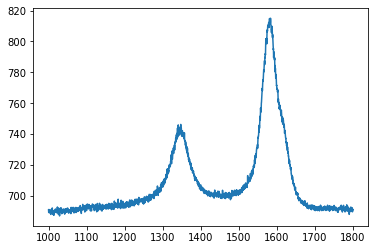

In [48]:
plt.plot(x,y);plt.show()

In [55]:
xDGindex1000=0
xDGindex1000=np.searchsorted(x,1000)
xDGindex1000

0

In [56]:
xDGindex1800=0
xDGindex1800=np.searchsorted(x,1800)
xDGindex1800

5489

In [57]:
xDG = data[xDGindex1000:xDGindex1800,0]
yDG = data[xDGindex1000:xDGindex1800,1]

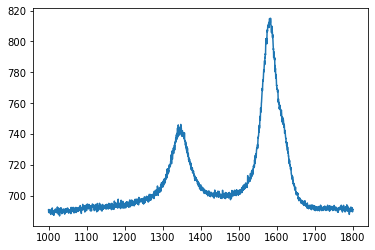

In [58]:
plt.plot(xDG,yDG);plt.show()

In [15]:
# LMFIT

In [59]:
bg = LinearModel(prefix='lin_')
pars = bg.guess(yDG, x=xDG)
#pars

In [60]:
lorentz1 = LorentzianModel(prefix='l1_')
#pars = lorentz1.guess(yDG, x=xDG)
pars.update(lorentz1.make_params())
pars['l1_center'].set(value=1350, min=1300, max=1380)
pars['l1_sigma'].set(value=10, min=5)
pars['l1_amplitude'].set(value=10000, min=5)
#pars

In [61]:
lorentz2 = LorentzianModel(prefix='l2_')
pars.update(lorentz2.make_params())

pars['l2_center'].set(value=1570, min=1520, max=1590)
pars['l2_sigma'].set(value=23, min=5)
pars['l2_amplitude'].set(value=15000, min=5)
#pars

In [62]:
lorentz3 = LorentzianModel(prefix='l3_')
pars.update(lorentz3.make_params())

pars['l3_center'].set(value=1620, min=1600, max=1650)
pars['l3_sigma'].set(value=10, min=5, max=100)
pars['l3_amplitude'].set(value=2000, min=5)
pars

name,value,initial value,min,max,vary,expression
lin_slope,0.02989425,None,-inf,inf,True,
lin_intercept,665.731616,None,-inf,inf,True,
l1_amplitude,10000.0000,None,5.00000000,inf,True,
l1_center,1350.00000,None,1300.00000,1380.00000,True,
l1_sigma,10.0000000,None,5.00000000,inf,True,
l1_fwhm,20.0000000,None,-inf,inf,False,2.0000000*l1_sigma
l1_height,318.309900,None,-inf,inf,False,"0.3183099*l1_amplitude/max(1e-15, l1_sigma)"
l2_amplitude,15000.0000,None,5.00000000,inf,True,
l2_center,1570.00000,None,1520.00000,1590.00000,True,
l2_sigma,23.0000000,None,5.00000000,inf,True,


In [63]:
mod = lorentz1 + lorentz2 + lorentz3 + bg
init = mod.eval(pars, x=xDG)
out = mod.fit(yDG, pars, x=xDG)

In [64]:
print(out.fit_report())

[[Model]]
    (((Model(lorentzian, prefix='l1_') + Model(lorentzian, prefix='l2_')) + Model(lorentzian, prefix='l3_')) + Model(linear, prefix='lin_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 145
    # data points      = 5489
    # variables        = 11
    chi-square         = 16436.7611
    reduced chi-square = 3.00050403
    Akaike info crit   = 6042.19395
    Bayesian info crit = 6114.90947
[[Variables]]
    lin_slope:     -0.00358607 +/- 1.1788e-04 (3.29%) (init = 0.02989425)
    lin_intercept:  694.467454 +/- 0.16140519 (0.02%) (init = 665.7316)
    l1_amplitude:   5288.36878 +/- 18.6609889 (0.35%) (init = 10000)
    l1_center:      1346.19714 +/- 0.08653421 (0.01%) (init = 1350)
    l1_sigma:       33.5322719 +/- 0.14277441 (0.43%) (init = 10)
    l1_fwhm:        67.0645438 +/- 0.28554881 (0.43%) == '2.0000000*l1_sigma'
    l1_height:      50.2005990 +/- 0.12974980 (0.26%) == '0.3183099*l1_amplitude/max(1e-15, l1_sigma)'
    l2_amplitude:   89

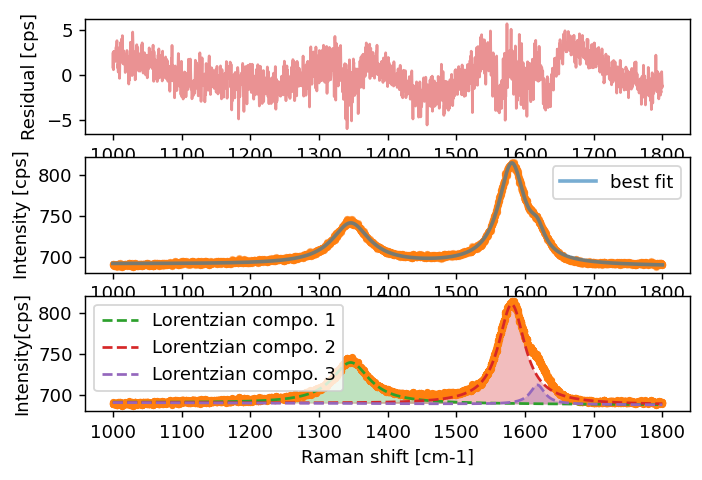

In [65]:
fig, ax = plt.subplots(3,1,dpi=130)
ax=ax.ravel()

ax[0].plot(xDG, out.best_fit - yDG, 'C3-', alpha=0.5)

ax[1].plot(xDG, yDG, 'C1.',alpha=0.5)
ax[1].plot(xDG, out.best_fit, '-', label='best fit',zorder=10,lw=2, alpha=0.6)

ax[2].plot(xDG, yDG, 'C1.')
comps = out.eval_components(x=xDG)
ax[2].plot(xDG, comps['l1_']+comps['lin_'], 'C2--', label='Lorentzian compo. 1')
ax[2].fill_between(xDG, comps['l1_']+comps['lin_'], comps['lin_'],facecolor='C2',alpha=0.3)
ax[2].plot(xDG, comps['l2_']+comps['lin_'], 'C3--', label='Lorentzian compo. 2')
ax[2].fill_between(xDG, comps['l2_']+comps['lin_'], comps['lin_'],facecolor='C3',alpha=0.3)
ax[2].plot(xDG, comps['l3_']+comps['lin_'], 'C4--', label='Lorentzian compo. 3')
ax[2].fill_between(xDG, comps['l3_']+comps['lin_'], comps['lin_'],facecolor='C4',alpha=0.3)

ax[0].set(xlabel="",ylabel="Residual [cps]")
ax[1].set(xlabel="",ylabel="Intensity [cps]")
ax[2].set(xlabel="Raman shift [cm-1]",ylabel="Intensity[cps]")
ax[1].legend(loc='best')
ax[2].legend(loc='best')

plt.savefig("ramfit.png",dpi=130)
plt.show()

In [66]:
for parname, param in out.params.items():
    print("%s = %f +/- %f " % (parname, param.value, param.stderr))

lin_slope = -0.003586 +/- 0.000118 
lin_intercept = 694.467454 +/- 0.161405 
l1_amplitude = 5288.368779 +/- 18.660989 
l1_center = 1346.197136 +/- 0.086534 
l1_sigma = 33.532272 +/- 0.142774 
l1_fwhm = 67.064544 +/- 0.285549 
l1_height = 50.200599 +/- 0.129750 
l2_amplitude = 8983.195390 +/- 29.335208 
l2_center = 1580.514253 +/- 0.049113 
l2_sigma = 23.431150 +/- 0.070952 
l2_fwhm = 46.862299 +/- 0.141904 
l2_height = 122.035840 +/- 0.181003 
l3_amplitude = 970.526401 +/- 21.663657 
l3_center = 1617.944283 +/- 0.143020 
l3_sigma = 12.996872 +/- 0.255129 
l3_fwhm = 25.993744 +/- 0.510257 
l3_height = 23.769424 +/- 0.257254 


In [67]:
od=out.params
l1_height_stderr=od['l1_height'].stderr
l2_height_stderr=od['l2_height'].stderr
vd = out.params.valuesdict()
#vd
l2_area = np.pi * vd['l2_amplitude'] * vd['l2_fwhm']
l1_area = np.pi * vd['l1_amplitude'] * vd['l1_fwhm']

In [74]:
GDAreaRatio = l2_area / l1_area

In [76]:
l1_height = vd['l1_height']
l2_height = vd['l2_height']

In [78]:
GDHeightRatio = l2_height / l1_height

In [80]:
GDHeightRatioMax = (l2_height + l2_height_stderr) / (l1_height - l1_height_stderr)
GDHeightRatioMin = (l2_height - l2_height_stderr) / (l1_height + l1_height_stderr)
GDHeightRatioPlus = GDHeightRatioMax - GDHeightRatio
GDHeightRatioMinus = GDHeightRatio - GDHeightRatioMin

In [84]:
GDHeightRatioPlus

0.009914344560088661

In [85]:
GDHeightRatioMinus

0.00986322692522501

// Results

In [88]:
INFILE

'G:\\raman\\teruhira\\20231218\\txt\\231214a_9-2.txt'

In [86]:
GDHeightRatio

2.430963825472958

In [87]:
GDAreaRatio

1.1869699667657405